# Team PILOT

## Brief: 
#### Create a classification model to predict overall rating of employer

## Problem space:
#### 1) Predict overall rating and 2) see if review date month or industry has a significant impact on overall rating

## Objective for today:
#### Develop a working MVP

## Success metric:
#### 1) Model accuarcy: 70%+
#### 2) Improve programming skills for building regression model

# 1) Importing libraries

In [238]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  

# 2) importing the (all) data

In [255]:
path = r'P:\DF\hackathon2\hackathon_data-master' # use your path

all_files = glob.glob(path + "/*2017.csv")

li = []

for filename in all_files:

    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
    
df = pd.concat(li, axis=0, ignore_index=True)

In [256]:
df.head()

,rundate,url,company_id,company_name,review_id,review_date,employee_occupation,employee_geography,employee_city,employee_state,...,career_opportunities_rating,recommend,outlook,approves_ceo,ceo,competitors,headquarters,industry,symbol,type
0,20170430,https://www.glassdoor.com/Overview/Working-at-...,76,Honeywell,14441449,2017-04-01,Anonymous Employee,Mumbai (India),Mumbai,NaN,...,4.0,Recommends,Positive Outlook,Approves of CEO,Darius Adamczyk,NaN,"Morris Plains, NJ",Information Technology,HON,Company
1,20170419,https://www.glassdoor.com/Overview/Working-at-...,522,Olive Garden Italian Restaurants,14441451,2017-04-01,Current Employee,"San Jose, CA",San Jose,CA,...,4.0,Recommends,Positive Outlook,Approves of CEO,Gene Lee,Unknown,"Orlando, FL","Restaurants, Bars & Food Services",NaN,Subsidiary or Business Segment
2,20170419,https://www.glassdoor.com/Overview/Working-at-...,234,CarMax,14441464,2017-04-01,Inventory Associate,NaN,NaN,NaN,...,2.0,Recommends,Positive Outlook,Approves of CEO,Bill Nash,NaN,"Richmond, VA",Retail,KMX,Company
3,20170419,https://www.glassdoor.com/Overview/Working-at-...,1497,Georgia State University,14441471,2017-04-01,Graduate Research Assistant,"Atlanta, GA",Atlanta,GA,...,4.0,Recommends,Neutral Outlook,Approves of CEO,Mark P. Becker,Unknown,"Atlanta, GA",Education,NaN,College / University
4,20170419,https://www.glassdoor.com/Overview/Working-at-...,724,Shell,14441472,2017-04-01,Reliability Engineer,Amsterdam (Netherlands),Amsterdam,NaN,...,4.0,Recommends,Neutral Outlook,No opinion of CEO,Ben van Beurden,NaN,The Hague (Netherlands),"Oil, Gas, Energy & Utilities",RDSA,Company


In [257]:
df.shape

(436676, 29)

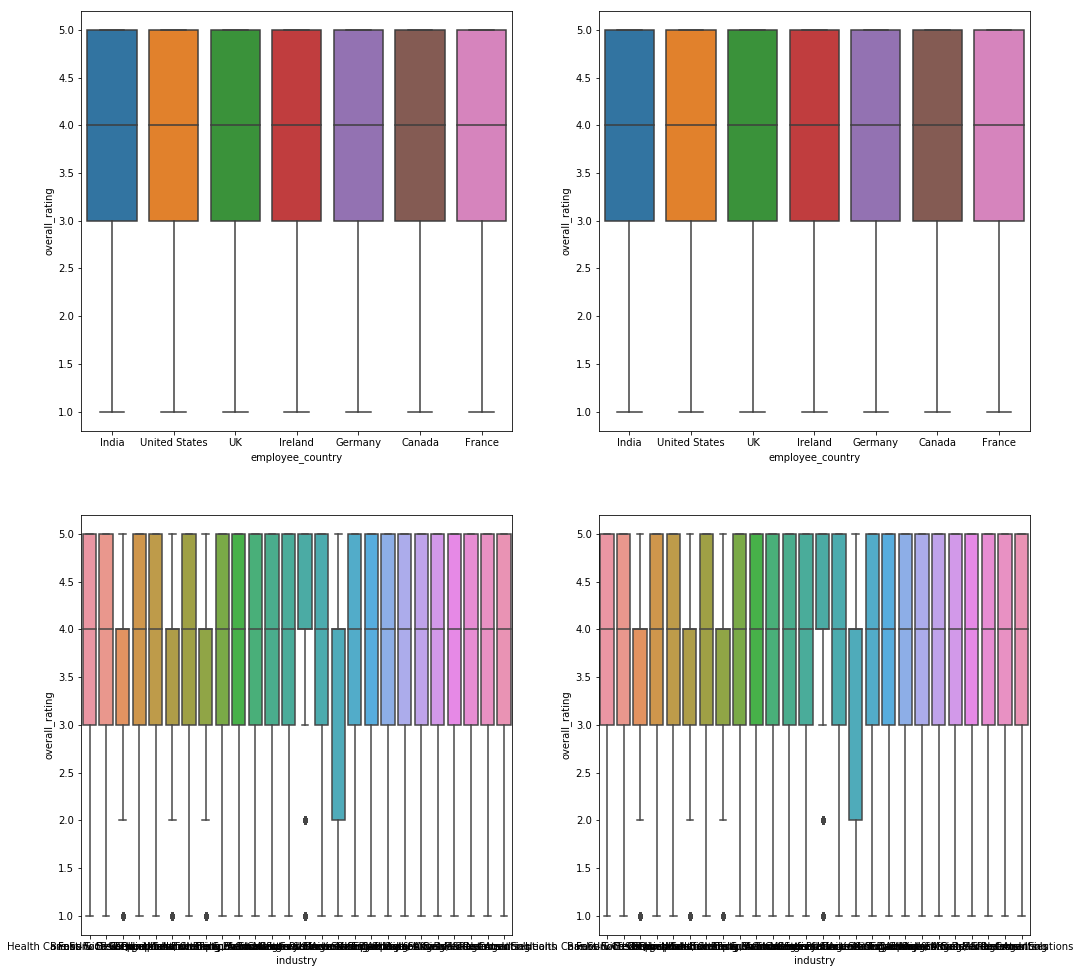

In [291]:
# any country above 1000 responses, any industry above 2000 responses
f, axes = plt.subplots(2, 2, figsize=(17, 17))
sns.boxplot(y = 'overall_rating', x = 'employee_country',data=df9, ax=axes[0, 0])
sns.boxplot(y = 'overall_rating', x = 'employee_country',data=df9, ax=axes[0, 1])
sns.boxplot(y = 'overall_rating', x = 'industry',data=df5, ax=axes[1, 1])
sns.boxplot(y = 'overall_rating', x = 'industry',data=df5, ax=axes[1, 0]) 


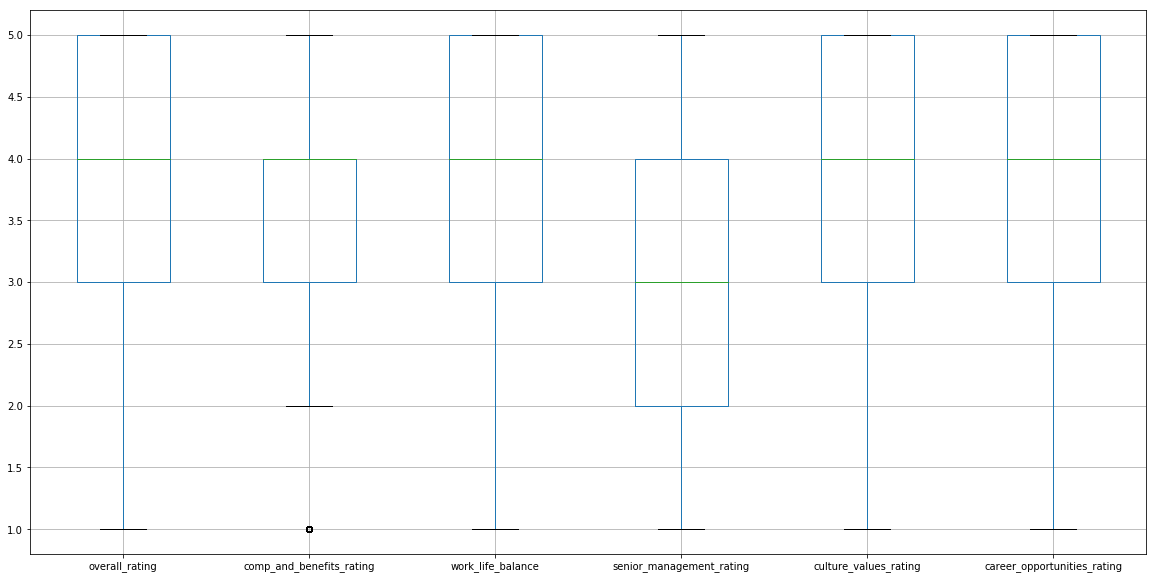

In [259]:
boxplot = df.boxplot(column=['overall_rating', 'comp_and_benefits_rating', 'work_life_balance', 'senior_management_rating', 'culture_values_rating', 'career_opportunities_rating'])
boxplot.figure.set_size_inches(20,10)
plt.show() 

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436676 entries, 0 to 436675
Data columns (total 29 columns):
rundate                        436676 non-null int64
url                            436676 non-null object
company_id                     436676 non-null int64
company_name                   436676 non-null object
review_id                      436676 non-null int64
review_date                    436676 non-null object
employee_occupation            436617 non-null object
employee_geography             235103 non-null object
employee_city                  235103 non-null object
employee_state                 180541 non-null object
employee_country               273099 non-null object
employee_status                436676 non-null object
employment_length              270757 non-null object
employment_type                382791 non-null object
overall_rating                 436676 non-null int64
comp_and_benefits_rating       383331 non-null float64
work_life_balance           

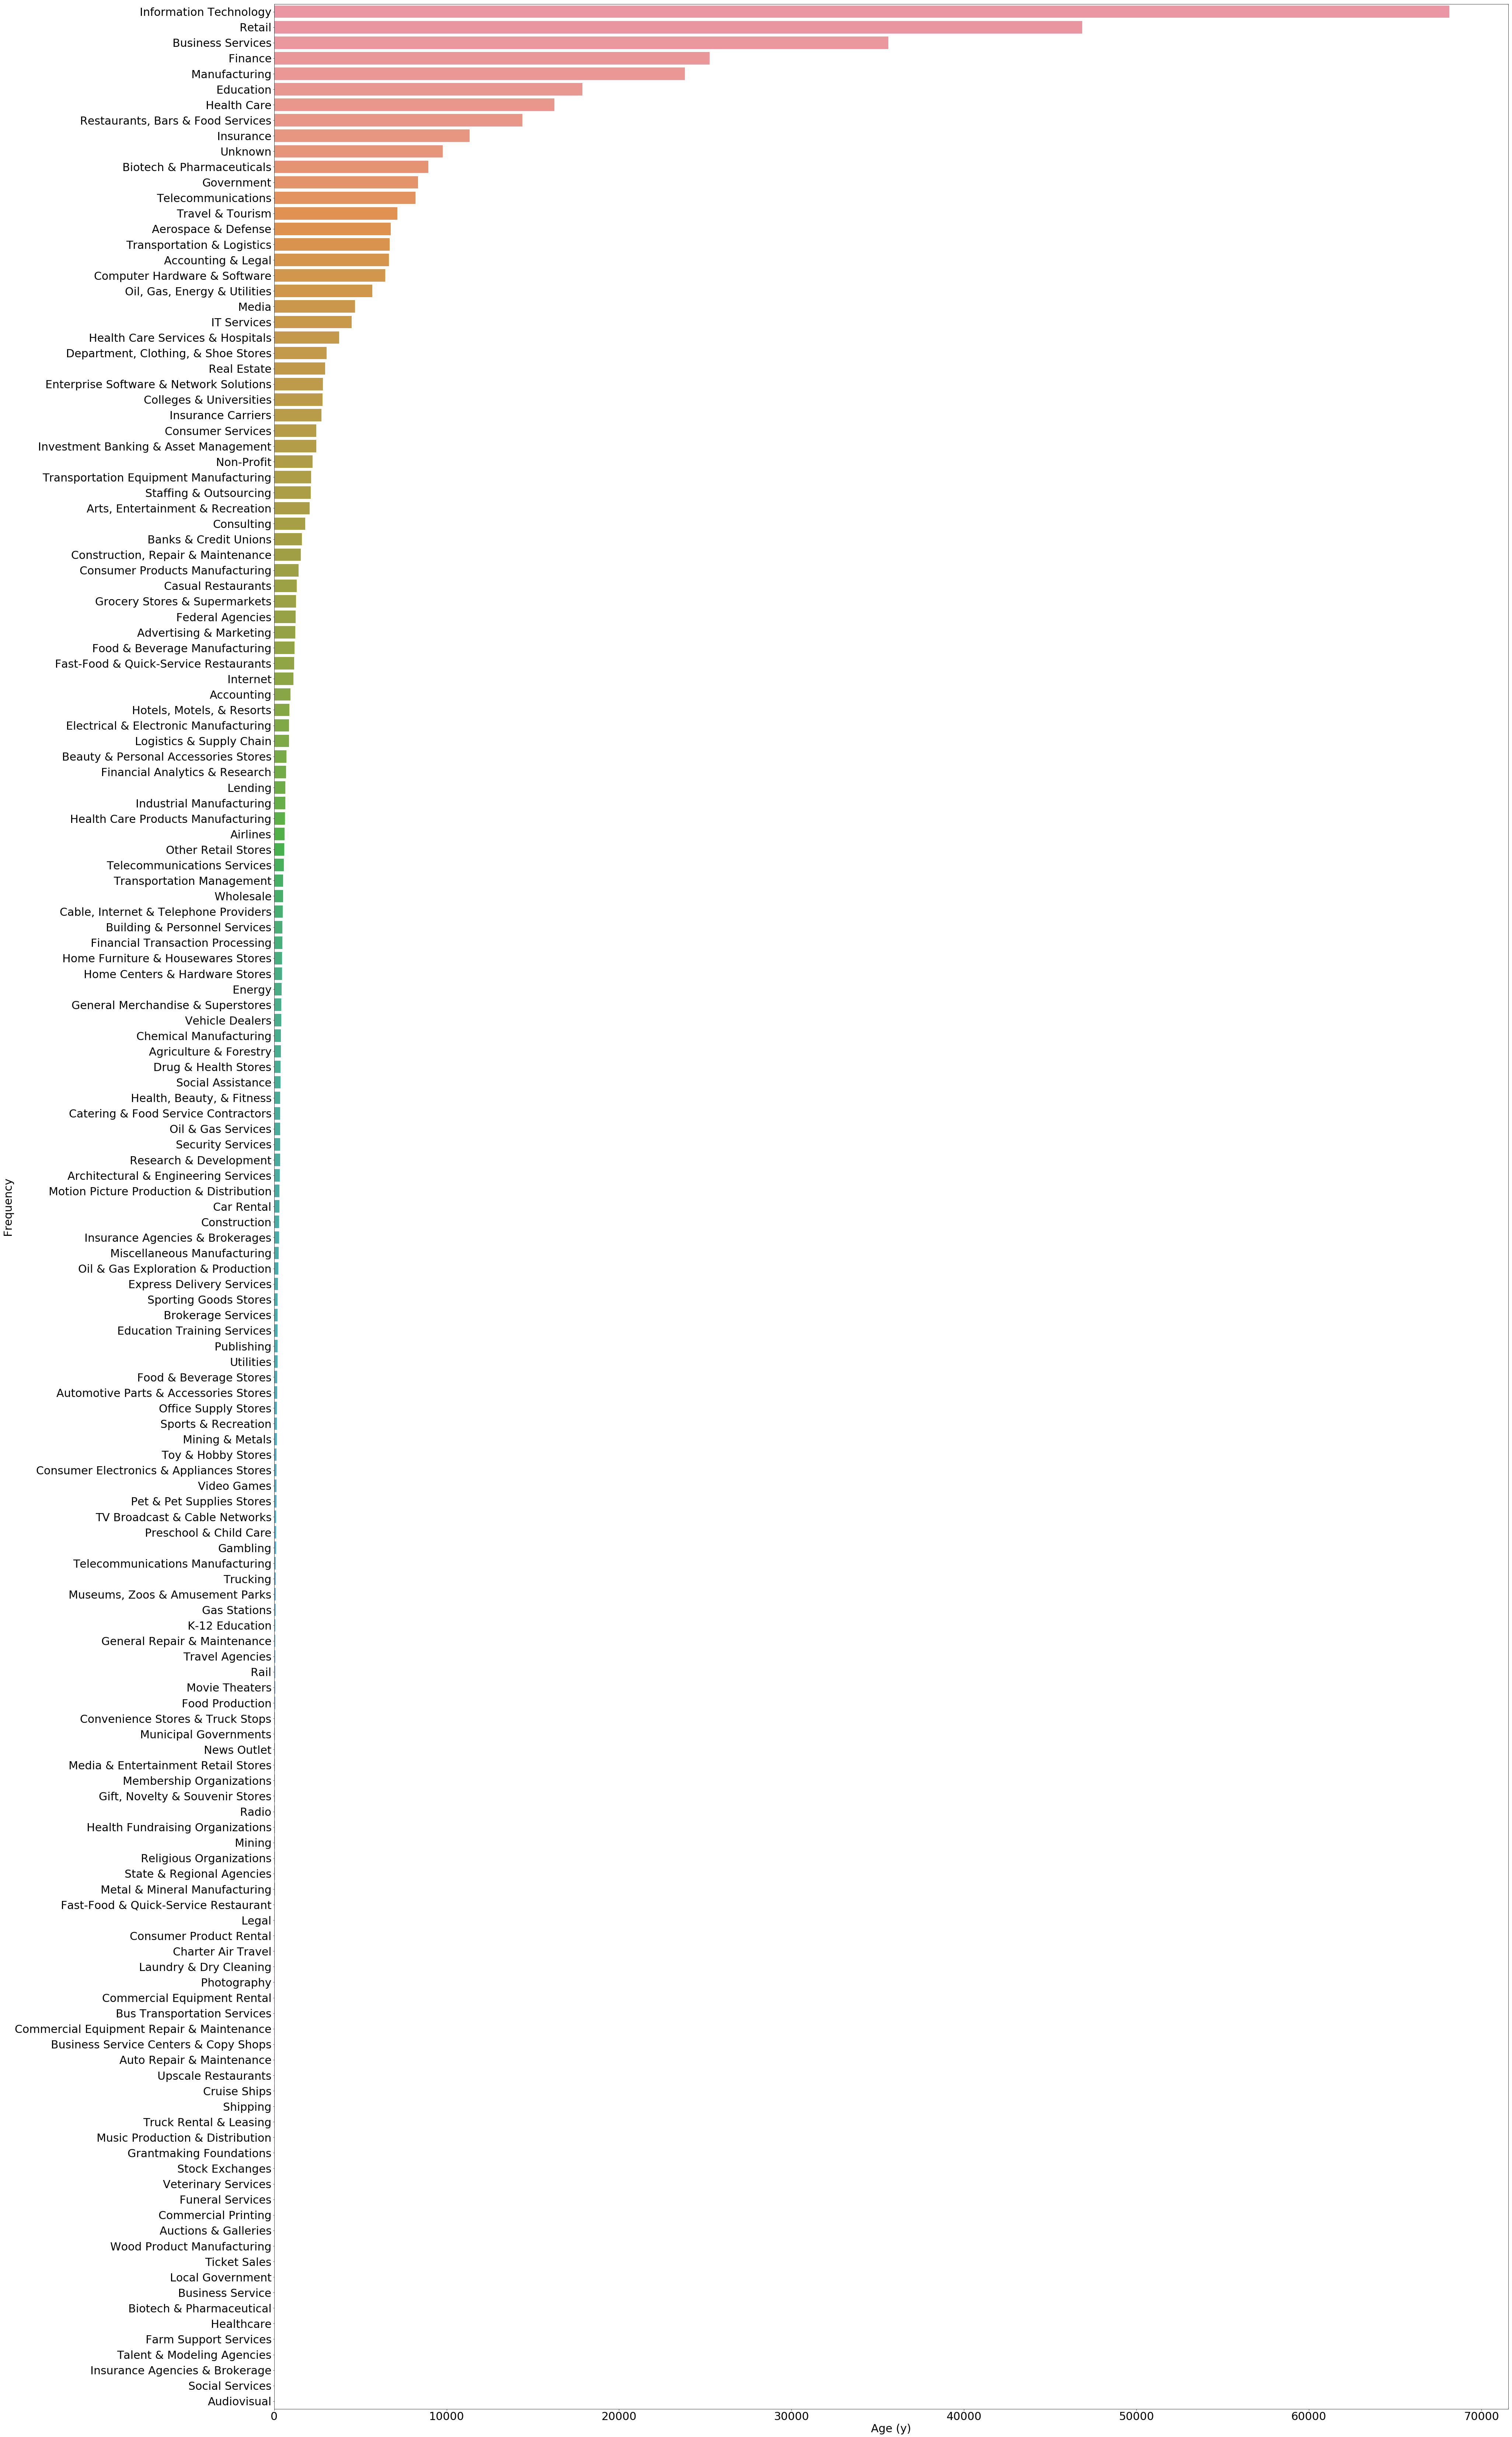

In [261]:
fig1 = sns.countplot(y='industry', orient='h', data=df, order = df['industry'].value_counts().index)
fig1.figure.set_size_inches(60,120)
fig1.set_xlabel("Age (y)", fontsize=30)
fig1.set_ylabel("Frequency", fontsize=30)
fig1.tick_params(labelsize = 30)
plt.show()

# Analysis based on base variables

In [262]:
df1 = df[['overall_rating', 'comp_and_benefits_rating', 'work_life_balance', 'senior_management_rating', 'culture_values_rating', 'career_opportunities_rating' ]]

In [263]:
df1.describe(include = "all")

,overall_rating,comp_and_benefits_rating,work_life_balance,senior_management_rating,culture_values_rating,career_opportunities_rating
count,436676.000000,383331.000000,384189.000000,377730.000000,380787.000000,383780.000000
mean,3.638288,3.404755,3.449857,3.181082,3.602318,3.411848
std,1.211447,1.246734,1.314548,1.378838,1.359635,1.313410
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [264]:
df2 = df1.dropna()

In [265]:
df1.shape

(436676, 6)

In [266]:
df2.shape

(373094, 6)

## 5. Correlation analysis

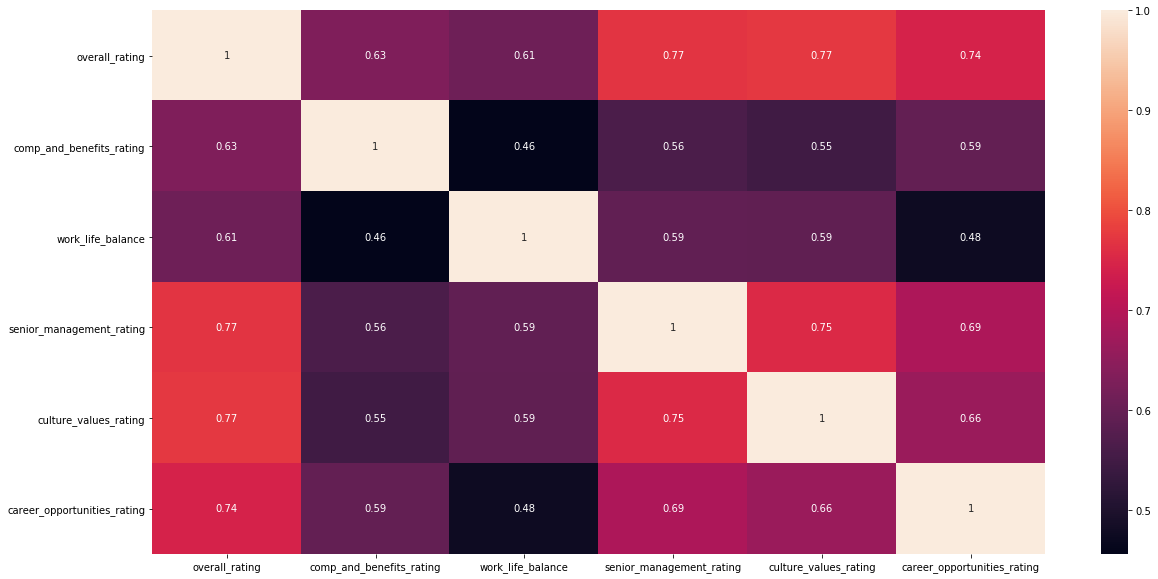

In [267]:
plt.figure(figsize=(20, 10))
sns.heatmap(df2.corr(),  annot=True)

## 6) Classification model

In [268]:
list(df2)

['overall_rating',
 'comp_and_benefits_rating',
 'work_life_balance',
 'senior_management_rating',
 'culture_values_rating',
 'career_opportunities_rating']

In [269]:
feature_cols = ['comp_and_benefits_rating',
 'work_life_balance',
 'senior_management_rating',
 'culture_values_rating',
 'career_opportunities_rating']
X = df2[feature_cols]
y = df2.overall_rating
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 123)

In [270]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500,criterion = 'entropy', max_depth=5,random_state=123)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [271]:
y_pred = clf.predict(X_test)

In [272]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.6443381864185089


Text(91.68, 0.5, 'predicted values')

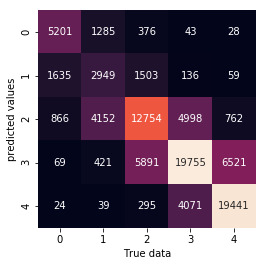

In [273]:
from sklearn.metrics import confusion_matrix
y_true = y_test.tolist()
mat = confusion_matrix(y_true,y_pred)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True data')
plt.ylabel('predicted values')

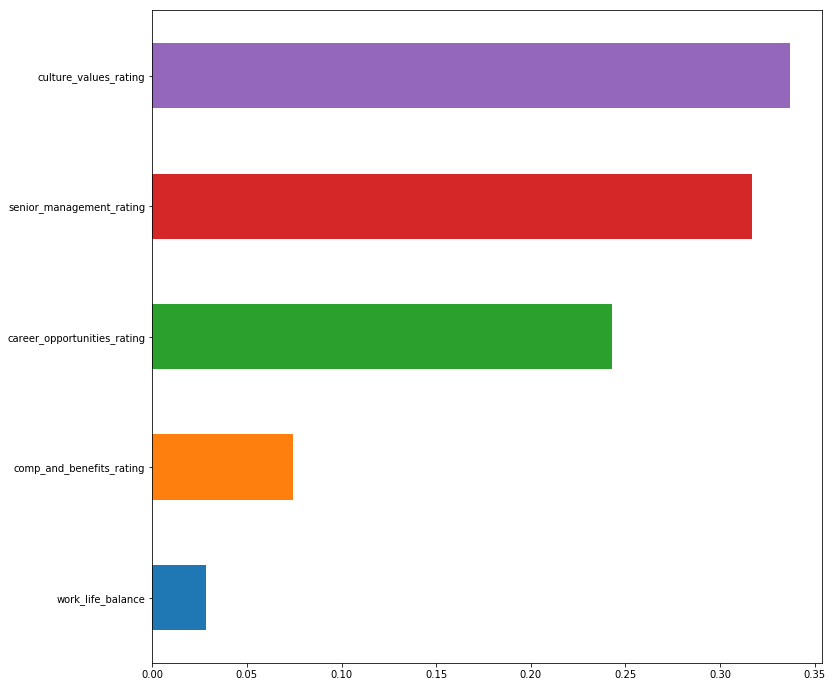

In [274]:
feature_importances = pd.Series(clf.feature_importances_, index = X.columns)
feature_importances = feature_importances.sort_values()
feature_importances.plot(kind='barh', figsize = (12,12))

# Analysis based on industry

In [185]:
df3 = df[['overall_rating', 'comp_and_benefits_rating', 'work_life_balance', 'senior_management_rating', 'culture_values_rating', 'career_opportunities_rating', 'industry']]

In [186]:
df3.head()

,overall_rating,comp_and_benefits_rating,work_life_balance,senior_management_rating,culture_values_rating,career_opportunities_rating,industry
0,3,2.0,2.0,3.0,1.0,3.0,Health Care Services & Hospitals
1,4,2.0,3.0,3.0,4.0,3.0,Banks & Credit Unions
2,3,NaN,NaN,NaN,NaN,NaN,Accounting
3,3,NaN,NaN,NaN,NaN,NaN,Biotech & Pharmaceuticals
4,3,1.0,3.0,2.0,4.0,2.0,IT Services


In [187]:
df3.shape

(207433, 7)

In [188]:
df4 = df3.dropna()
df4.shape

(165713, 7)

In [189]:
df4['industry'].describe(include ='all')


count                           165713
unique                             129
top       Computer Hardware & Software
freq                             16214
Name: industry, dtype: object

In [190]:
df4['industry'].value_counts()


Computer Hardware & Software                 16214
IT Services                                  10499
Health Care Services & Hospitals              7294
Enterprise Software & Network Solutions       6918
Department, Clothing, & Shoe Stores           6339
Colleges & Universities                       5869
Staffing & Outsourcing                        5381
Investment Banking & Asset Management         5206
Insurance Carriers                            5140
Internet                                      4975
Accounting                                    4813
Banks & Credit Unions                         4071
Unknown                                       4021
Consulting                                    3802
Biotech & Pharmaceuticals                     3702
Casual Restaurants                            3086
Consumer Products Manufacturing               2960
Advertising & Marketing                       2941
Fast-Food & Quick-Service Restaurants         2896
Grocery Stores & Supermarkets  

In [191]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165713 entries, 0 to 207432
Data columns (total 7 columns):
overall_rating                 165713 non-null int64
comp_and_benefits_rating       165713 non-null float64
work_life_balance              165713 non-null float64
senior_management_rating       165713 non-null float64
culture_values_rating          165713 non-null float64
career_opportunities_rating    165713 non-null float64
industry                       165713 non-null object
dtypes: float64(5), int64(1), object(1)
memory usage: 10.1+ MB


In [192]:
df5 = df4.groupby('industry').filter(lambda x: x['industry'].count()>2000)
df5['industry'].value_counts()

Computer Hardware & Software               16214
IT Services                                10499
Health Care Services & Hospitals            7294
Enterprise Software & Network Solutions     6918
Department, Clothing, & Shoe Stores         6339
Colleges & Universities                     5869
Staffing & Outsourcing                      5381
Investment Banking & Asset Management       5206
Insurance Carriers                          5140
Internet                                    4975
Accounting                                  4813
Banks & Credit Unions                       4071
Unknown                                     4021
Consulting                                  3802
Biotech & Pharmaceuticals                   3702
Casual Restaurants                          3086
Consumer Products Manufacturing             2960
Advertising & Marketing                     2941
Fast-Food & Quick-Service Restaurants       2896
Grocery Stores & Supermarkets               2695
Telecommunications S

In [193]:
df6 = pd.get_dummies(df5)
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122847 entries, 0 to 207432
Data columns (total 32 columns):
overall_rating                                      122847 non-null int64
comp_and_benefits_rating                            122847 non-null float64
work_life_balance                                   122847 non-null float64
senior_management_rating                            122847 non-null float64
culture_values_rating                               122847 non-null float64
career_opportunities_rating                         122847 non-null float64
industry_Accounting                                 122847 non-null uint8
industry_Advertising & Marketing                    122847 non-null uint8
industry_Aerospace & Defense                        122847 non-null uint8
industry_Banks & Credit Unions                      122847 non-null uint8
industry_Biotech & Pharmaceuticals                  122847 non-null uint8
industry_Casual Restaurants                         122847 non-nu

In [194]:
list(df6)

['overall_rating',
 'comp_and_benefits_rating',
 'work_life_balance',
 'senior_management_rating',
 'culture_values_rating',
 'career_opportunities_rating',
 'industry_Accounting',
 'industry_Advertising & Marketing',
 'industry_Aerospace & Defense',
 'industry_Banks & Credit Unions',
 'industry_Biotech & Pharmaceuticals',
 'industry_Casual Restaurants',
 'industry_Colleges & Universities',
 'industry_Computer Hardware & Software',
 'industry_Consulting',
 'industry_Consumer Products Manufacturing',
 'industry_Department, Clothing, & Shoe Stores',
 'industry_Enterprise Software & Network Solutions',
 'industry_Fast-Food & Quick-Service Restaurants',
 'industry_Federal Agencies',
 'industry_Food & Beverage Manufacturing',
 'industry_Grocery Stores & Supermarkets',
 'industry_Health Care Services & Hospitals',
 'industry_Hotels, Motels, & Resorts',
 'industry_IT Services',
 'industry_Insurance Carriers',
 'industry_Internet',
 'industry_Investment Banking & Asset Management',
 'industry_

In [195]:
feature_cols = [ 'comp_and_benefits_rating',
 'work_life_balance',
 'senior_management_rating',
 'culture_values_rating',
 'career_opportunities_rating',
 'industry_Accounting',
 'industry_Advertising & Marketing',
 'industry_Banks & Credit Unions',
 'industry_Biotech & Pharmaceuticals',
 'industry_Casual Restaurants',
 'industry_Colleges & Universities',
 'industry_Computer Hardware & Software',
 'industry_Consulting',
 'industry_Consumer Products Manufacturing',
 'industry_Department, Clothing, & Shoe Stores',
 'industry_Enterprise Software & Network Solutions',
 'industry_Fast-Food & Quick-Service Restaurants',
 'industry_Health Care Services & Hospitals',
 'industry_IT Services',
 'industry_Insurance Carriers',
 'industry_Internet',
 'industry_Investment Banking & Asset Management',
 'industry_Staffing & Outsourcing',
 'industry_Telecommunications Services',
 'industry_Unknown']
X = df6[feature_cols]
y = df6.overall_rating
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 123)

In [199]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500,criterion = 'entropy', max_depth=5 ,random_state=123)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [200]:
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.655346444386559


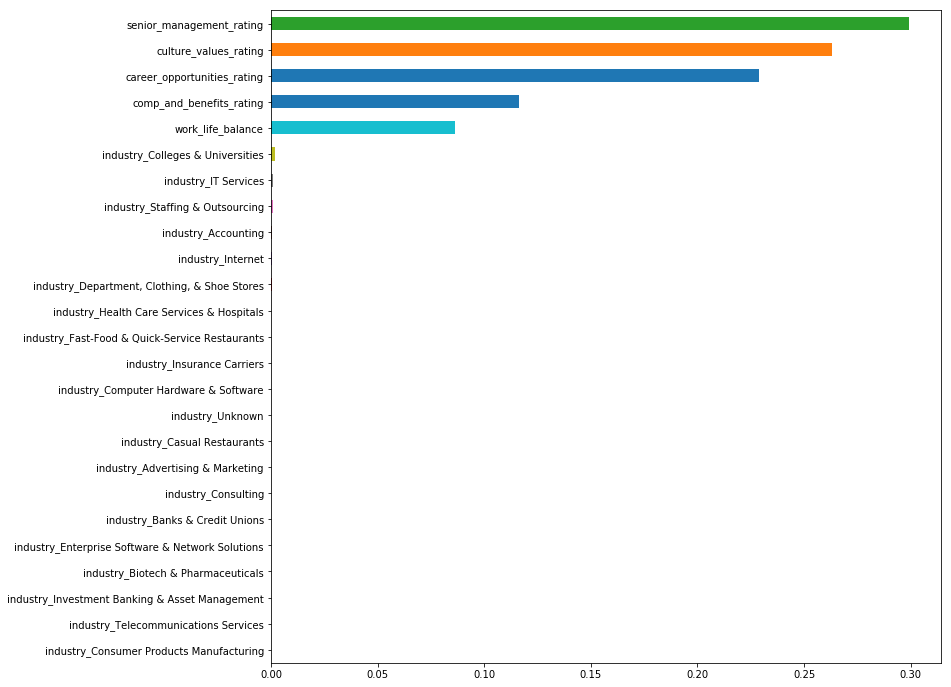

In [201]:
feature_importances = pd.Series(clf.feature_importances_, index = X.columns)
feature_importances = feature_importances.sort_values()
feature_importances.plot(kind='barh', figsize = (12,12))

# Analysis based on country

In [174]:
df7 = df[['overall_rating', 'comp_and_benefits_rating', 'work_life_balance', 'senior_management_rating', 'culture_values_rating', 'career_opportunities_rating', 'employee_country']]
df7.shape

(207433, 7)

In [153]:
df8 = df7.dropna()
df8['employee_country'].value_counts()

United States               61392
India                       19959
UK                           6626
Canada                       2840
France                       1578
Germany                      1202
Ireland                      1076
Australia                     952
Singapore                     706
Netherlands                   548
Philippines                   500
Mexico                        450
Brazil                        445
Malaysia                      372
Spain                         361
Poland                        357
Switzerland                   314
Romania                       304
Czech Republic                271
United Arab Emirates          259
Italy                         247
Belgium                       225
China                         217
Hungary                       201
Israel                        196
Japan                         169
Hong Kong                     155
Russia                        149
South Africa                  148
Egypt         

In [175]:
df8.shape

(105195, 7)

In [168]:
df9 = df8.groupby('employee_country').filter(lambda x: x['employee_country'].count()>1000)
df10 = pd.get_dummies(df9)
df10.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94673 entries, 0 to 207432
Data columns (total 13 columns):
overall_rating                    94673 non-null int64
comp_and_benefits_rating          94673 non-null float64
work_life_balance                 94673 non-null float64
senior_management_rating          94673 non-null float64
culture_values_rating             94673 non-null float64
career_opportunities_rating       94673 non-null float64
employee_country_Canada           94673 non-null uint8
employee_country_France           94673 non-null uint8
employee_country_Germany          94673 non-null uint8
employee_country_India            94673 non-null uint8
employee_country_Ireland          94673 non-null uint8
employee_country_UK               94673 non-null uint8
employee_country_United States    94673 non-null uint8
dtypes: float64(5), int64(1), uint8(7)
memory usage: 5.7 MB


In [169]:
list(df10)

['overall_rating',
 'comp_and_benefits_rating',
 'work_life_balance',
 'senior_management_rating',
 'culture_values_rating',
 'career_opportunities_rating',
 'employee_country_Canada',
 'employee_country_France',
 'employee_country_Germany',
 'employee_country_India',
 'employee_country_Ireland',
 'employee_country_UK',
 'employee_country_United States']

In [170]:
feature_cols = ['comp_and_benefits_rating',
 'work_life_balance',
 'senior_management_rating',
 'culture_values_rating',
 'career_opportunities_rating',
 'employee_country_Canada',
 'employee_country_France',
 'employee_country_Germany',
 'employee_country_India',
 'employee_country_Ireland',
 'employee_country_UK',
 'employee_country_United States']
X = df10[feature_cols]
y = df10.overall_rating
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 123)

In [182]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500,criterion = 'entropy', max_depth=3,random_state=123)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [183]:
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6466686383032659


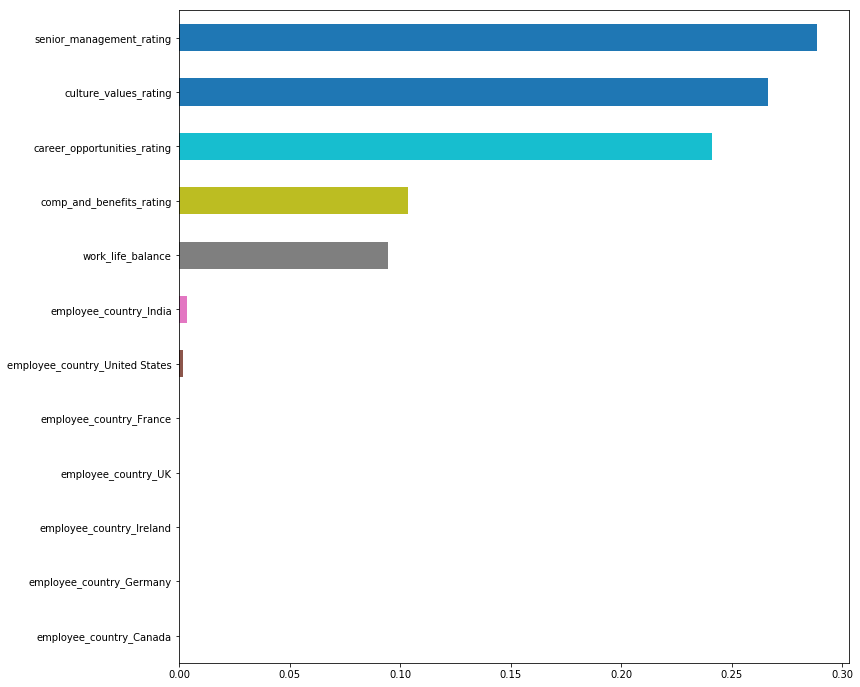

In [184]:
feature_importances = pd.Series(clf.feature_importances_, index = X.columns)
feature_importances = feature_importances.sort_values()
feature_importances.plot(kind='barh', figsize = (12,12))

# x) Analysis by review date month

In [275]:
df11 = df[['overall_rating', 'comp_and_benefits_rating', 'work_life_balance', 'senior_management_rating', 'culture_values_rating', 'career_opportunities_rating', 'review_date']]
df11.shape

(436676, 7)

In [276]:
df12 = df11.dropna()
df12.shape

(373094, 7)

In [277]:
df12['review_date'] = df['review_date'].astype('datetime64[ns]')
df12.head()

C:\UBS\Dev\Miniconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,overall_rating,comp_and_benefits_rating,work_life_balance,senior_management_rating,culture_values_rating,career_opportunities_rating,review_date
0,4,3.0,5.0,4.0,5.0,4.0,2017-04-01
1,3,2.0,4.0,5.0,3.0,4.0,2017-04-01
2,2,2.0,2.0,2.0,2.0,2.0,2017-04-01
3,3,3.0,3.0,5.0,5.0,4.0,2017-04-01
4,4,4.0,4.0,3.0,3.0,4.0,2017-04-01


In [278]:
df12['review_date'] = df12['review_date'].dt.month

C:\UBS\Dev\Miniconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [279]:
df12['review_date'].unique()

array([ 4,  8, 12,  2,  1,  7,  6,  3,  5, 11, 10,  9], dtype=int64)

In [280]:
df12['review_date'] = df12['review_date'].astype(str)
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373094 entries, 0 to 436675
Data columns (total 7 columns):
overall_rating                 373094 non-null int64
comp_and_benefits_rating       373094 non-null float64
work_life_balance              373094 non-null float64
senior_management_rating       373094 non-null float64
culture_values_rating          373094 non-null float64
career_opportunities_rating    373094 non-null float64
review_date                    373094 non-null object
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ MB


C:\UBS\Dev\Miniconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [281]:
df13 = pd.get_dummies(df12)
df13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373094 entries, 0 to 436675
Data columns (total 18 columns):
overall_rating                 373094 non-null int64
comp_and_benefits_rating       373094 non-null float64
work_life_balance              373094 non-null float64
senior_management_rating       373094 non-null float64
culture_values_rating          373094 non-null float64
career_opportunities_rating    373094 non-null float64
review_date_1                  373094 non-null uint8
review_date_10                 373094 non-null uint8
review_date_11                 373094 non-null uint8
review_date_12                 373094 non-null uint8
review_date_2                  373094 non-null uint8
review_date_3                  373094 non-null uint8
review_date_4                  373094 non-null uint8
review_date_5                  373094 non-null uint8
review_date_6                  373094 non-null uint8
review_date_7                  373094 non-null uint8
review_date_8                  

In [282]:
list(df13)

['overall_rating',
 'comp_and_benefits_rating',
 'work_life_balance',
 'senior_management_rating',
 'culture_values_rating',
 'career_opportunities_rating',
 'review_date_1',
 'review_date_10',
 'review_date_11',
 'review_date_12',
 'review_date_2',
 'review_date_3',
 'review_date_4',
 'review_date_5',
 'review_date_6',
 'review_date_7',
 'review_date_8',
 'review_date_9']

In [283]:
feature_cols = ['comp_and_benefits_rating',
 'work_life_balance',
 'senior_management_rating',
 'culture_values_rating',
 'career_opportunities_rating',
 'review_date_1',
 'review_date_10',
 'review_date_11',
 'review_date_12',
 'review_date_2',
 'review_date_3',
 'review_date_4',
 'review_date_5',
 'review_date_6',
 'review_date_7',
 'review_date_8',
 'review_date_9']
X = df13[feature_cols]
y = df13.overall_rating
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 123)

In [287]:
clf = RandomForestClassifier(n_estimators=500,criterion = 'entropy', max_depth=7,random_state=123)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [288]:
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6497094581555417


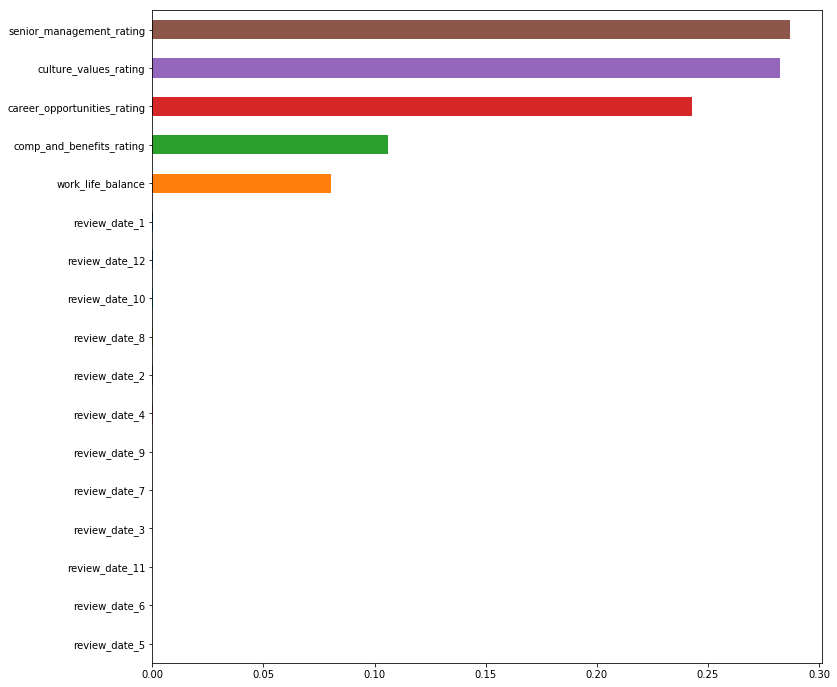

In [289]:
feature_importances = pd.Series(clf.feature_importances_, index = X.columns)
feature_importances = feature_importances.sort_values()
feature_importances.plot(kind='barh', figsize = (12,12))